In [1]:
#24MAI0114 ABHAYNATH K
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r"D:\VIT\AI ML\train.csv")

In [3]:
#Display the first 5 rows
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
#24MAI0114 ABHAYNATH K
#Describing the dataset
data.describe

<bound method NDFrame.describe of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour 

In [5]:
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [6]:
#24MAI0114 ABHAYNATH K
#Preprocess the Data
#Use these few features. We'll use GrLivArea (Above grade living area square feet) and YearBuilt (Original construction date) as features to predict SalePrice.


#selecting features and targer variables

features=['GrLivArea','YearBuilt']
target=['SalePrice']

#extracting the faetures and targets to the varible
x=data[features]
y=data[target]

In [7]:
#filling missing values using mean
x= x.fillna(x.mean())
y=y.fillna(y.mean())

In [8]:
#splitting the data into train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [9]:
#24MAI0114 ABHAYNATH K
#tansforming features into polynomial feature
poly_features=PolynomialFeatures(degree=2)
x_poly_train=poly_features.fit_transform(x_train)
x_poly_test=poly_features.fit_transform(x_test)

In [10]:
#create and train the model
model=LinearRegression()
model.fit(x_poly_train, y_train)


LinearRegression()

In [11]:
#24MAI0114 ABHAYNATH K
#Making prediction
y_train_pred=model.predict(x_poly_train)
y_test_pred=model.predict(x_poly_test)

In [12]:
#Evaluating the Model
#Calculating the performance matrix
train_mse=mean_squared_error(y_train,y_train_pred)
test_mse=mean_squared_error(y_test,y_test_pred)
train_r2=r2_score(y_train,y_train_pred)
test_r2=r2_score(y_test,y_test_pred)

print("24MAI0114  ABHAYNATHK")
print("Training Mean Squared Error(MSE) : ",train_mse)
print("Test Mean Squared Error(MSE) : ",test_mse)
print("Training R2 Score : ",train_r2)
print("Test R2 Scoire : ",test_r2)

24MAI0114  ABHAYNATHK
Training Mean Squared Error(MSE) :  1985235901.004621
Test Mean Squared Error(MSE) :  2384305400.3696957
Training R2 Score :  0.6671608462328039
Test R2 Scoire :  0.6891520209224489


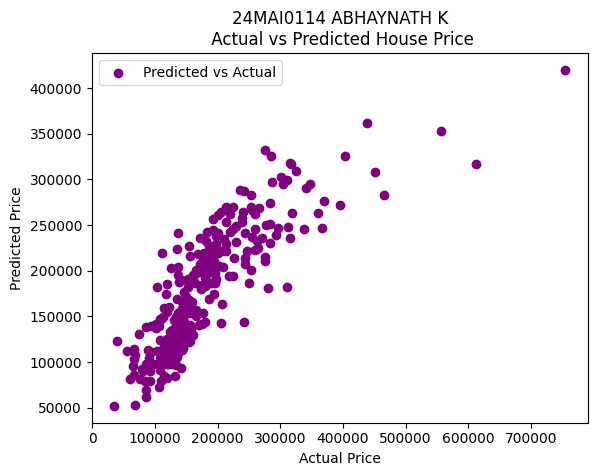

In [13]:
#24MAI0114 ABHAYNATH K
#Visulaizing the result
#actual VS predicted
plt.scatter(y_test,y_test_pred,color='purple', label ='Predicted vs Actual')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("24MAI0114 ABHAYNATH K\n Actual vs Predicted House Price")
plt.legend()
plt.show()